### Question 1

\begin{equation}
p(\theta)=\frac{\tilde{p}(\theta)}{Z}
\end{equation}

\begin{equation}
\tilde{p}(\theta) = e^{-sin(|\theta|)-\frac{\theta^2}{10}}
\end{equation}

\begin{equation}
\mathbb{E}_{\theta \sim p(\theta)}(|\theta|^2) = \int_{-\infty}^{\infty}|\theta|^2 \cdot p(\theta)d\theta
\end{equation}

In [1]:
## Q1.1 & Q1.2 

from scipy import integrate
import numpy as np 
from matplotlib import pyplot as plt 

theta = np.linspace(-15,15,1000)
p_tilde = lambda x: np.exp(-np.sin(abs(x))-(x**2/10))
Z = integrate.quad(p_tilde, theta[0], theta[-1])[0]
print('Normalisation constant = Z:',Z)
plt.plot(theta,p_tilde(theta),'b',label=r'$\tilde{p}(\theta)$')
plt.plot(theta,p_tilde(theta)/Z,'r--',label=r'$p(\theta)$')
plt.legend()
plt.grid()
plt.show()

Normalisation constant = Z: 4.229348631570762


<Figure size 640x480 with 1 Axes>

In [2]:
## Q1.3

theta = np.linspace(-15,15,1000)
inter = lambda x: abs(x)**2*(np.exp(-np.sin(abs(x))-(x**2/10))/Z)
Expected = integrate.quad(inter, -np.inf, np.inf)[0]
print('Expected Value with Quad:',Expected)

Expected Value with Quad: 8.725413277362781


In [3]:
from IPython.display import display, Latex

theta = np.linspace(-15,15,1000)
p_func = lambda x: np.exp(-np.sin(abs(x))-(x**2/10))/Z
proba_quad = integrate.quad(p_func, 2, np.inf)[0]


display(Latex(r'Using Quad $p(\theta>2)$ = '+str(proba_quad)))

<IPython.core.display.Latex object>

### Question 2

The proposal distribution was selected with a mean at 0 and variance of 3, to ensure that it dominates the unscaled density, as seen in the figure below. 

-0.01905187733294761
Normalisation constant = Z: 4.2293478814205105
# Accepted: 21149 0.42298
# Rejected: 28851 0.57702


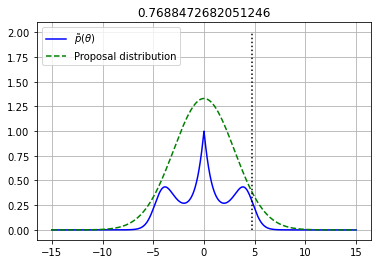

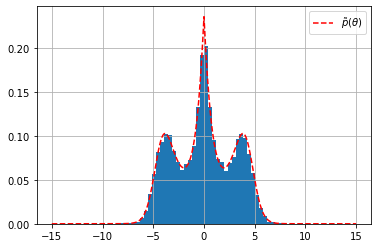

In [4]:
import scipy.stats as ss

theta = np.linspace(-15,15,10000)
p_tilde = lambda x: np.exp(-np.sin(abs(x))-(x**2/10))

x_ac = []
x_rj = []

for k in range(50000):

    q_prop = ss.norm(loc=0,scale=3)

    k_const = 10 # selected by looking at the plot and ensuring the entire distribution is covered 

    x_sample = q_prop.rvs()

    ratio = p_tilde(x_sample)/(q_prop.pdf(x_sample)*k_const)

    u = np.random.rand()

    if ratio > u: 
        x_ac.append(x_sample)
    else:
        x_rj.append(x_sample)
    
Z = np.sum(p_tilde(theta)* (theta[2] - theta[1]))

print(np.mean(x_ac))
print('Normalisation constant = Z:',Z)

print("# Accepted:",len(x_ac),len(x_ac)/(len(x_ac) + len(x_rj)))
print("# Rejected:",len(x_rj),len(x_rj)/(len(x_ac) + len(x_rj)))

plt.figure(1)
plt.title(ratio)
plt.plot(theta,p_tilde(theta),'b',label=r'$\tilde{p}(\theta)$')
plt.plot(theta,q_prop.pdf(theta)*k_const,'g--',label='Proposal distribution')
plt.plot([x_sample,x_sample],[0,2],'k:')
plt.grid()
plt.legend()
plt.show()

plt.figure(2)
plt.plot(theta,p_tilde(theta)/Z,'r--',label=r'$\tilde{p}(\theta)$')
plt.hist(x_ac,density=True,bins=50) 
plt.grid()
plt.legend()
plt.show()



Monte Carlo integration can be performed with the equivalent equation for the estimate shown below.

\begin{equation}
\mathbb{E}_{\theta \sim p(\theta)}(|\theta|^2) = \int_{-\infty}^{\infty}|\theta|^2 \cdot p(\theta)d\theta = \frac{1}{N_s}\sum_{n=1}^{N_s}|\theta|^2
\end{equation}

In [5]:
Expected =sum(abs(np.array(x_ac))**2)/len(x_ac)
print('Expected Value with MC:',Expected)

Expected = integrate.quad(inter, -np.inf, np.inf)[0]
print('Expected Value with Quad:',Expected,'\n')

# Play around with this to discuss the number of sufficient samples for an adequate estimate 
print('Total Number of Samples Used:',len(x_ac)+len(x_rj))
print('Number of Accepted Samples Used:',len(x_ac))

Expected Value with MC: 8.736036355699706
Expected Value with Quad: 8.72541482497039 

Total Number of Samples Used: 50000
Number of Accepted Samples Used: 21149


In [7]:
def I(x,a):
    if x<=a:
        return 0
    elif x>a:
        return 1

sum_theta = 0
for i in range(len(x_ac)):
    sum_theta += I(x_ac[i],2)
    
P_2 = 1/len(x_ac)*sum_theta

print(P_2)

0.2730152725897206


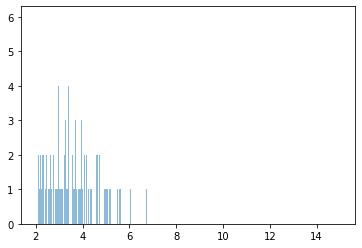

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [22]:
theta = np.linspace(2,15,len(x_ac))

pdf1,_,_ = plt.hist(x_ac,theta,density=False) 
plt.show()

proba = np.sum(pdf1)/len(pdf1)
            
display(Latex(r'Using MC $p(\theta>2)$ = '+str(proba)))
display(Latex(r'Using Quad $p(\theta>2)$ = '+str(proba_quad)))

Discussion , shortcomings of rejection sampling:
- The acceptance rate goes down in high-dimensional spaces.
- It can be difficult to find a good k.

### Question 3

Importance sampling:
\begin{equation}
\mathbb{E}_{\theta \sim p(\theta)}(|\theta|^2) = \sum_{n=1}^{N_s}|\theta|^2 \cdot w_s
\end{equation}

with 
\begin{equation}
w_s = \frac{\frac{\tilde{p}(\theta_s)}{\tilde{q}(\theta_s)}}{\sum_{m=1}^S \frac{\tilde{p}(\theta_m)}{\tilde{q}(\theta_m)}}
\end{equation}

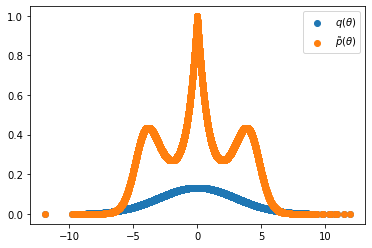

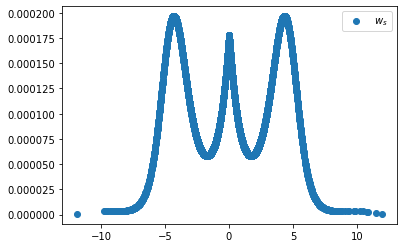

8.665000551716982


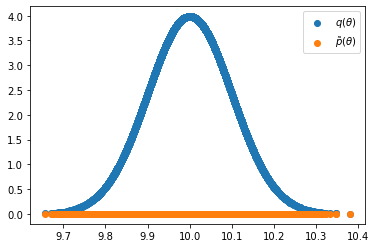

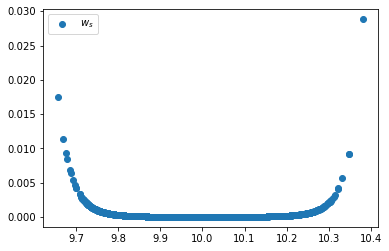

99.55334095591452


In [103]:
import scipy.stats as ss

epsilon = 1e-30 # To prevent numerical errors

#####################
# proposal number 1 #
#####################
N = 10000
theta = ss.norm.rvs(loc=0,scale=3,size=N)
q_theta = ss.norm.pdf(theta,loc=0,scale=3) + epsilon
p_tilde = lambda x: np.exp(-np.sin(abs(x))-(x**2/10))
p_tilde_theta = p_tilde(theta) 

plt.scatter(theta,q_theta,label=r'$q(\theta)$')
plt.scatter(theta,p_tilde_theta,label=r'$\tilde{p}(\theta)$')
plt.legend()
plt.show()

w_s = (p_tilde_theta/q_theta)/np.sum(p_tilde_theta/q_theta)
plt.scatter(theta,w_s,label=r'$w_s$');plt.legend();plt.show()

estimate = np.sum(w_s*abs(theta)**2)
print(estimate)

#####################
# proposal number 2 #
#####################
N = 10000
theta = ss.norm.rvs(loc=10,scale=0.1,size=N)
q_theta = ss.norm.pdf(theta,loc=10,scale=0.1) + epsilon
p_tilde = lambda x: np.exp(-np.sin(abs(x))-(x**2/10))
p_tilde_theta = p_tilde(theta)

plt.scatter(theta,q_theta,label=r'$q(\theta)$')
plt.scatter(theta,p_tilde_theta,label=r'$\tilde{p}(\theta)$')
plt.legend()
plt.show()

w_s = (p_tilde_theta/q_theta)/np.sum(p_tilde_theta/q_theta)
plt.scatter(theta,w_s,label=r'$w_s$');plt.legend();plt.show()

estimate = np.sum(w_s*abs(theta)**2)
print(estimate)

Calculate Z
\begin{equation}
\frac{Z_p}{Z_q} = \frac{1}{S} \cdot \sum_{s=1}^S \frac{\tilde{p}(\theta_s)}{\tilde{q}(\theta_s)}
\end{equation}

\begin{equation}
Z_p = \frac{1}{S} \cdot \sum_{s=1}^S \frac{\tilde{p}(\theta_s)}{q(\theta_s)}
\end{equation}

In [104]:
import scipy.stats as ss

epsilon = 1e-30 # To prevent numerical errors

#####################
# proposal number 1 #
#####################
N = 10000
theta = ss.norm.rvs(loc=0,scale=3,size=N)
q_theta = ss.norm.pdf(theta,loc=0,scale=3) + epsilon
p_tilde = lambda x: np.exp(-np.sin(abs(x))-(x**2/10))
p_tilde_theta = p_tilde(theta)

Z1 = np.sum(p_tilde_theta/q_theta)/len(theta)
print('proposal 1: Z=',Z1)


#####################
# proposal number 2 #
#####################
N = 10000
theta = ss.norm.rvs(loc=10,scale=0.1,size=N)
q_theta = ss.norm.pdf(theta,loc=10,scale=0.1) + epsilon
p_tilde = lambda x: np.exp(-np.sin(abs(x))-(x**2/10))
p_tilde_theta = p_tilde(theta)

Z2 = np.sum(p_tilde_theta/q_theta)/len(theta)
print('proposal 2: Z=',Z2)

proposal 1: Z= 4.243407099927482
proposal 2: Z= 6.158752763414503e-05


### Question 4

### Question 5

### Question 6